<a href="https://colab.research.google.com/github/fernandoantonio36/Fast-Cesar-School/blob/main/Projeto_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Imports

Nessa seção iremos importar as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn import metrics
#from bokeh.sampledata.iris import flowers as 

from sklearn.cluster import KMeans

###Carregar a base de dados
Abaixo iremos carregar a base de dados "Iris".
Disponível em: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data

Obs: iremos considerar a variável de saída: **Iris-setosa**

In [ ]:
df = pd.read_csv('fernando.csv')

In [ ]:
df.head()

,sepal-length,sepal-width,petal-lenth,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


###Tratamento dos dados
Aplique a padronização nos dados

###Análise exploratória
Plote um gráfico de dispersão para identificar visualmente o número de grupos. Realize esse plot para cada par de atributos, de modo a obter a melhor visualização.

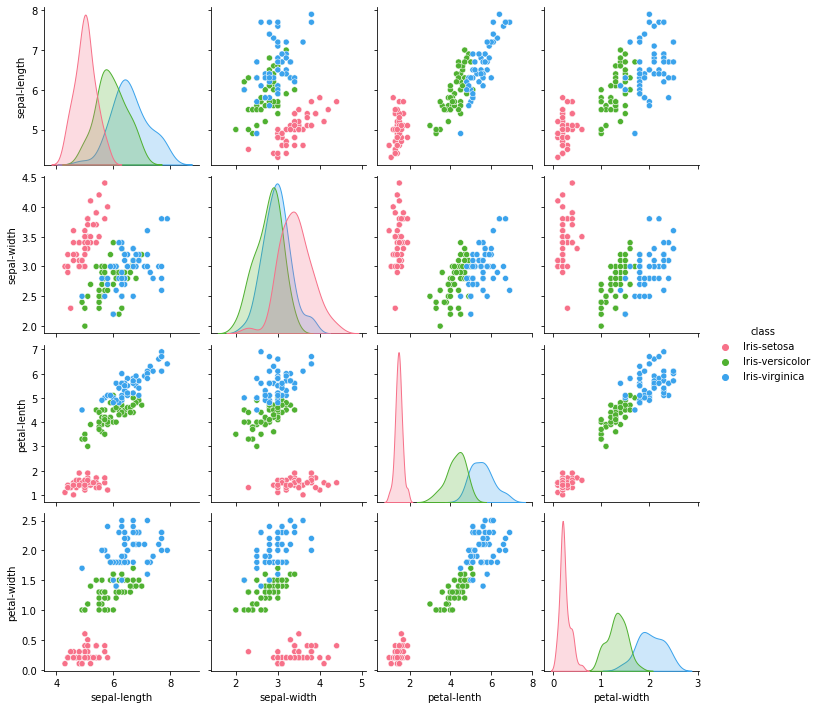

In [ ]:
%matplotlib inline
import seaborn as sns
sns.pairplot(df,hue='class', palette="husl")


In [ ]:
print("dimensões do dataset (exemplos, features): ", df.shape)
\print(df.describe())

dimensões do dataset (exemplos, features):  (150, 5)

as estatísticas básicas dos dados: 
       sepal-length  sepal-width  petal-lenth  petal-width
count    150.000000   150.000000   150.000000   150.000000
mean       5.843333     3.054000     3.758667     1.198667
std        0.828066     0.433594     1.764420     0.763161
min        4.300000     2.000000     1.000000     0.100000
25%        5.100000     2.800000     1.600000     0.300000
50%        5.800000     3.000000     4.350000     1.300000
75%        6.400000     3.300000     5.100000     1.800000
max        7.900000     4.400000     6.900000     2.500000


Selecione as duas melhores features de acordo com as visualizações do passo anterior

As duas melhores Features baseadas nos dados são os seguintes pares: 
1. petal-lenth x petal-width
2. sepal-lenth x petal-length

Em ambas as features, é possível ver uma correlação entre cada par de atributos, pois trocando a ordem dos pares, continuamos a ver os conjuntos razoavelmente bem separados. Além disso, dentre os grupos encontrados, essas features são as que mais atendem à alta densidade entre os pontos do mesmo grupo e à maior separabilidade entre os grupos, que é o que se espera de um bom agrupamento. Embora haja separação, é possível ver que iris-setosa é o grupo que mais se separa dos outros grupos.

###Método Elbow
Implemente o método elbow para encontrar o melhor número de grupos

*   Realize uma busca a partir de 2 grupos até 10
*   Utilize a inertia para avaliar a variação
*   Plote os valores da inertia em cada K

In [ ]:
X = df.drop(columns=['class'])
X.head()
y_true = df.iloc[:,4]
print(y_true)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object


In [ ]:
def get_clustering_metric(X, k):
  model = KMeans(n_clusters=k, random_state=0).fit(X)

  return model.inertia_

2: 152.36870647733906
3: 78.940841426146
4: 57.317873214285704
5: 46.56163015873016
6: 38.930963049671746
7: 34.19068792479663
8: 30.06387443273313
9: 27.842356060606072
10: 26.04820224804435
best k:  3


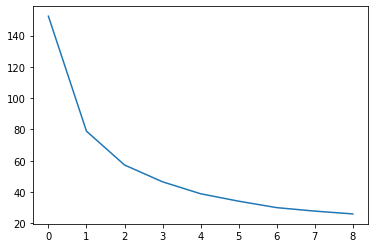

In [ ]:
# declare uma lista de possíveis valores para o k
n_clusters_candidates = [2, 3, 4, 5, 6, 7, 8, 9, 10]

values = []

# itere sobre a lista e armazene as diferenças
for k in n_clusters_candidates:
	
	
  current_metric_value = get_clustering_metric(X, k)
  print(f'{k}: {current_metric_value}')

  values.append(current_metric_value)

min_value = np.inf
best_k = -1

for i in range(1, len(values)-1):
  val1 = values[i-1] - values[i]
  val2 = values[i] - values[i+1]
  val = val2 / val1

  if val < min_value:
      min_value = val
      best_k = n_clusters_candidates[i]

print("best k: ", best_k)
_= plt.plot(values)

### Execute o K-Means

Execute o k-means com o K escolhido de forma automática da etapa anterior

In [ ]:
model = KMeans(
    n_clusters=best_k,
    random_state=0
)

model.fit(X)

y_predict = model.labels_

### Avaliação do K-Means
Imprima os índices da silhueta e NMI e plote o gráfico de dispersão com a saída do k-means

Obs: para calcular o NMI será necessário um tratamento para converter o tipo textual em numérico.

In [ ]:
sil = metrics.silhouette_score(X, y_predict)
nmi = metrics.normalized_mutual_info_score(y_true, y_predict)

print("Silhueta: ", sil)
print("NMI: ", nmi)

Silhueta:  0.5525919445499757
NMI:  0.7581756800057785


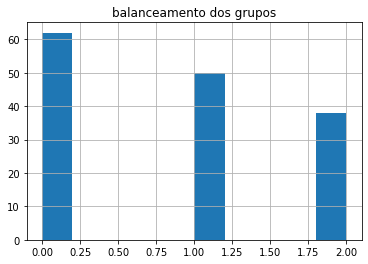

In [ ]:
# check como ficou o balanceamento
_ = pd.DataFrame(y_predict).hist()
plt.title('balanceamento dos grupos')
plt.show()

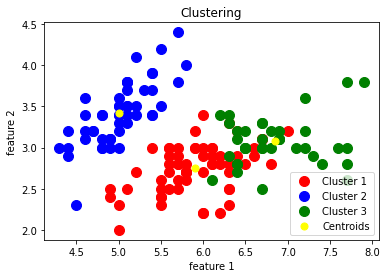

In [ ]:

# plot de como ficou a clusterização
plt.scatter(X.iloc[y_predict==0, 0], X.iloc[y_predict==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X.iloc[y_predict==1, 0], X.iloc[y_predict==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X.iloc[y_predict==2, 0], X.iloc[y_predict==2, 1], s=100, c='green', label ='Cluster 3')


plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=50, c='yellow', label = 'Centroids')
plt.title('Clustering')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()